In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import itertools
from collections import Counter

# **Gaussian Naïve Bayes** (Iris)

The standard iris dataset to predict the Species of flower using 4 different **features** : 
1. Sepal.Length
2. Sepal.Width
3. Petal.Length
4. Petal.Width

In [ ]:
# Import data
training = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_test.csv')

In [ ]:
# Create the X, Y, Training and Test
xtrain = training.drop('Species', axis=1)
ytrain = training.loc[:, 'Species']
xtest = test.drop('Species', axis=1)
ytest = test.loc[:, 'Species']

In [ ]:
# Init the Gaussian Classifier and Train the model 
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predict Output 
pred = model.predict(xtest)

Text(89.18, 0.5, 'Predicted')

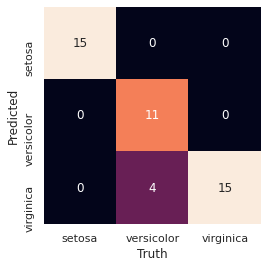

In [ ]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [ ]:
# Plot the Report and Accuracy
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



# **Vectorisation**

In [ ]:
text = ["My name is Paul my life is Jane! And we live our life together" , "My name is Guido my life is Victoria! And we live our life together"]
toyy = CountVectorizer()
#toy = CountVectorizer(stop_words = 'english')
toyy.fit_transform(text)

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [ ]:
#toyy.fit_transform(text).toarray()
#toyy.get_feature_names()
#print(toyy.vocabulary_)

In [ ]:
matrix = toyy.transform(text)
print(matrix)

  (0, 0)	1
  (0, 2)	2
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1
  (0, 6)	2
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (0, 12)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	2
  (1, 4)	2
  (1, 5)	1
  (1, 6)	2
  (1, 7)	1
  (1, 8)	1
  (1, 10)	1
  (1, 11)	1
  (1, 12)	1


In [ ]:
features = toyy.get_feature_names()
df_res = pd.DataFrame(matrix.toarray(), columns=features)
df_res

,and,guido,is,jane,life,live,my,name,our,paul,together,victoria,we
0,1,0,2,1,2,1,2,1,1,1,1,0,1
1,1,1,2,0,2,1,2,1,1,0,1,1,1


# **Multinomial Naïve Bayes** (Spam Massage)

Following **attributes** :

1. label : spam or ham (not spam)
2. message 

In [ ]:
msg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Scientist Discussion/Data/spam.csv', encoding = "latin-1", usecols=["v1", "v2"])
msg.columns = ['label','message']
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


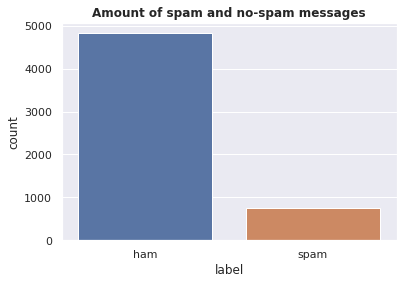

In [ ]:
sns.set()
sns.countplot(data = msg, x= msg["label"]).set_title("Amount of spam and no-spam messages", fontweight = "bold")
plt.show()

In [ ]:
X = msg["message"]
y = msg["label"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_features = 300, stop_words = 'english') #1% / 300 occurences 
cv.fit(Xtrain)

Xtrain_tr = cv.transform(Xtrain)
Xtest_tr = cv.transform(Xtest)

In [ ]:
modelM = MultinomialNB()
modelM.fit(Xtrain_tr, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_test_pred = modelM.predict(Xtest_tr)
#print(modelM.score(Xtest_tr, ytest))
#print(confusion_matrix(ytest, y_test_pred))
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

         ham       0.96      0.98      0.97      1196
        spam       0.84      0.75      0.79       197

    accuracy                           0.94      1393
   macro avg       0.90      0.86      0.88      1393
weighted avg       0.94      0.94      0.94      1393



In [ ]:
def classifier(message):
    
    transformed = cv.transform([message])
    prediction =  modelM.predict(transformed)
    
    if prediction == "ham":
        return "This message is no spam!"
    else:
        return "This message is spam!"
    
classifier("Free entry in 2 a wkly comp to win FA Cup fina...")

'This message is spam!'

# **Multinomial Naïve Bayes** (Play Tennis)

In [ ]:
tennis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Scientist Discussion/Data/PlayTennis.csv')
tennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
number = LabelEncoder()
tennis['Outlook'] = number.fit_transform(tennis['Outlook'])
tennis['Temperature'] = number.fit_transform(tennis['Temperature'])
tennis['Humidity'] = number.fit_transform(tennis['Humidity'])
tennis['Wind'] = number.fit_transform(tennis['Wind'])
tennis['Play Tennis'] = number.fit_transform(tennis['Play Tennis'])
tennis.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [ ]:
x1 = tennis.drop(["Play Tennis"], axis = 1)
y1 = tennis["Play Tennis"]

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.4, random_state=54)
modelM = MultinomialNB()
tennis_model = modelM.fit(x1_train, y1_train)

In [ ]:
y1_pred = tennis_model.predict(x1_test)

In [ ]:
y1_pred

array([1, 1, 1, 1, 1, 1])

In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91         5

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6

